In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
stock = "AAPL"
data = yf.Ticker(stock).history(period="1y")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-21 00:00:00-04:00,142.027444,146.978086,141.808740,146.401505,86548600,0.0,0.0
2022-10-24 00:00:00-04:00,146.321968,149.344033,145.138983,148.568634,75981900,0.0,0.0
2022-10-25 00:00:00-04:00,149.204858,151.590714,148.479168,151.441589,74732300,0.0,0.0
2022-10-26 00:00:00-04:00,150.069729,151.093653,147.166936,148.469223,88194300,0.0,0.0
2022-10-27 00:00:00-04:00,147.196764,148.170981,143.279998,143.946045,109180200,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-16 00:00:00-04:00,176.750000,179.080002,176.509995,178.720001,52517000,0.0,0.0
2023-10-17 00:00:00-04:00,176.649994,178.419998,174.800003,177.149994,57549400,0.0,0.0
2023-10-18 00:00:00-04:00,175.580002,177.580002,175.110001,175.839996,54764400,0.0,0.0


In [49]:
df = data.copy()
df.head()
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.0
mean,163.457280,165.168223,161.952506,163.638182,6.517037e+07,0.003745,0.0
std,18.933920,18.737812,19.154180,18.912595,2.119619e+07,0.029494,0.0
min,125.474664,127.227194,123.642480,124.488876,3.145820e+07,0.000000,0.0
25%,147.540532,149.686372,146.579622,148.084923,5.053360e+07,0.000000,0.0
50%,164.739375,166.584313,164.659591,165.716690,5.958120e+07,0.000000,0.0
75%,178.199678,179.863551,177.065439,178.499405,7.433530e+07,0.000000,0.0
max,195.975362,197.962667,195.016650,196.185074,1.647624e+08,0.240000,0.0


In [50]:
df.dropna(inplace=True)

In [51]:
df.index = pd.to_datetime(df.index)

In [52]:
df['Daily Return'] = df['Close'].pct_change()

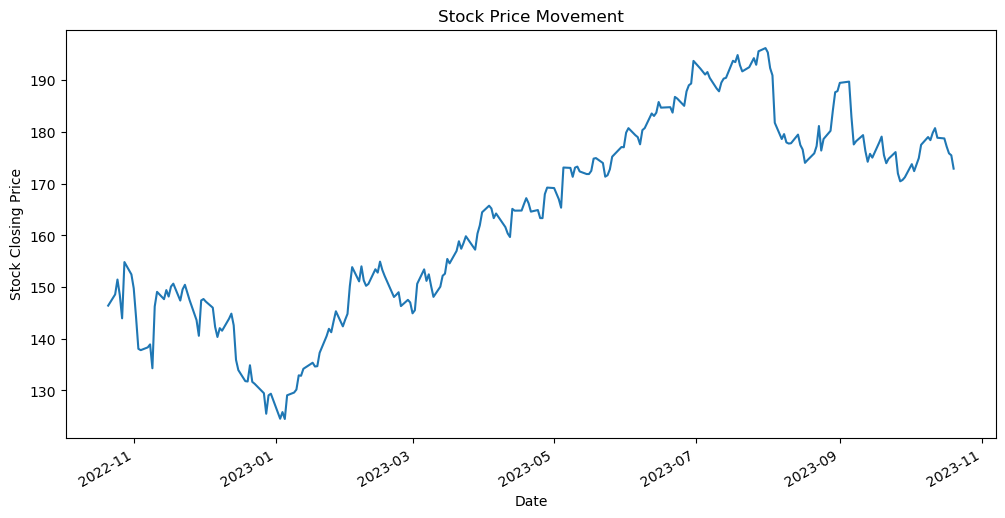

In [54]:
df['Close'].plot(figsize=(12, 6), title="Stock Price Movement")
plt.xlabel('Date')
plt.ylabel('Stock Closing Price')
plt.show()

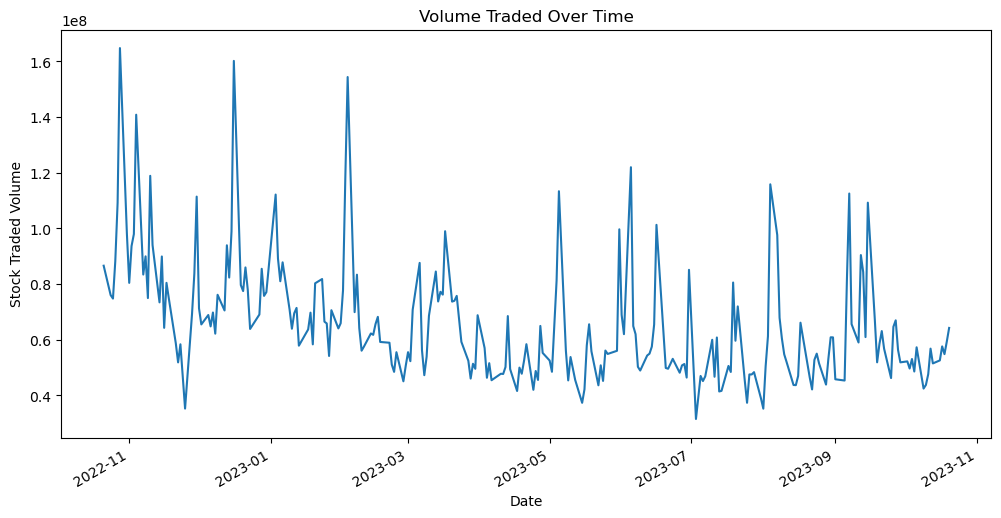

In [57]:
df['Volume'].plot(figsize=(12, 6), title="Volume Traded Over Time")
plt.xlabel('Date')
plt.ylabel('Stock Traded Volume')
plt.show()

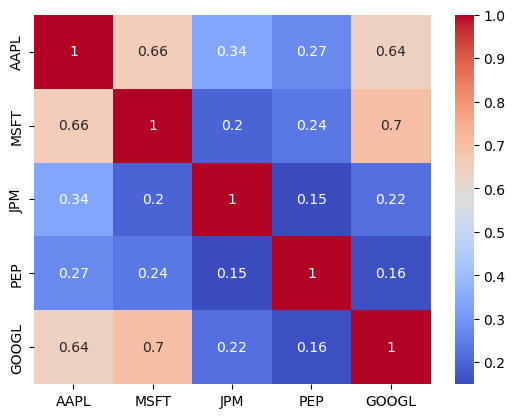

In [55]:

import seaborn as sns

stock_list = ["AAPL", "MSFT", "JPM", "PEP", "GOOGL"]
close_prices = pd.DataFrame()

for stock in stock_list:
   close_prices[stock] = yf.Ticker(stock).history(period="1y")['Close']

correlation = close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

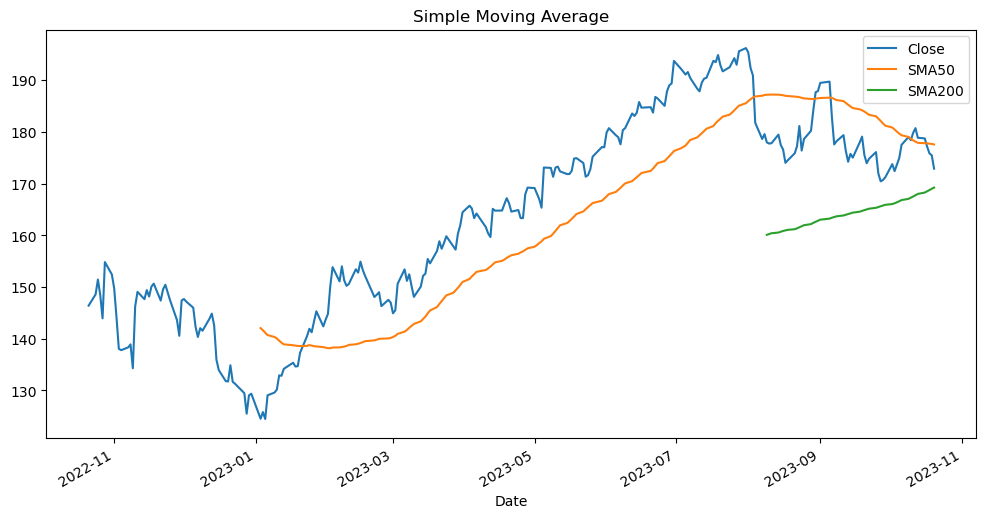

In [58]:
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

df[['Close', 'SMA50', 'SMA200']].plot(figsize=(12,6))
plt.title('Simple Moving Average')
plt.show()

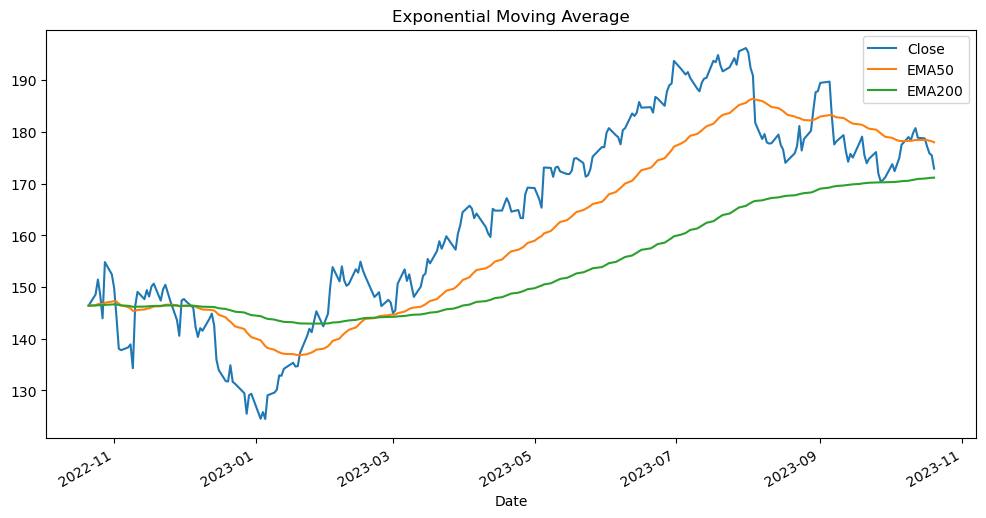

In [23]:

df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

df[['Close', 'EMA50', 'EMA200']].plot(figsize=(12,6))
plt.title('Exponential Moving Average')
plt.show()

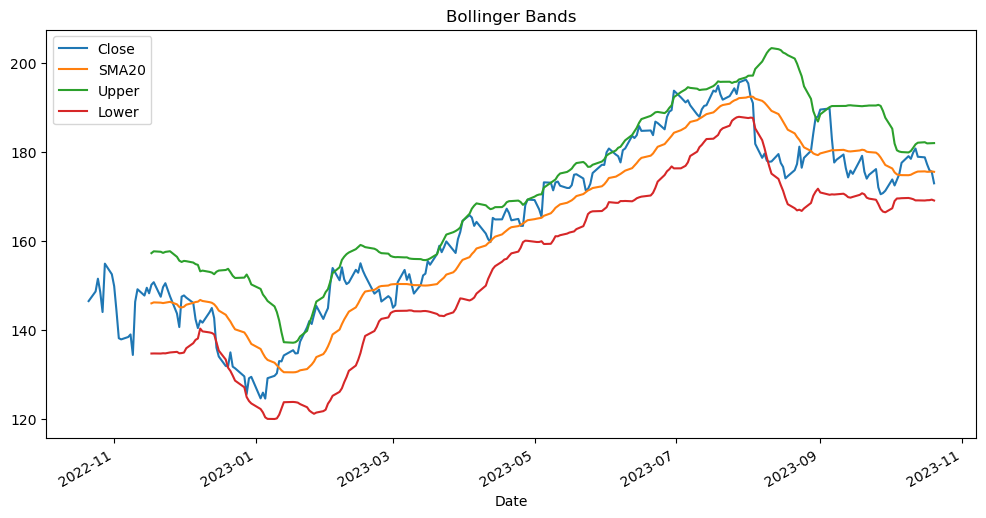

In [59]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['SMA20'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['SMA20'] - 2*df['Close'].rolling(window=20).std()

df[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(12,6))
plt.title('Bollinger Bands')
plt.show()

/Users/rishav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rishav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rishav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rishav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

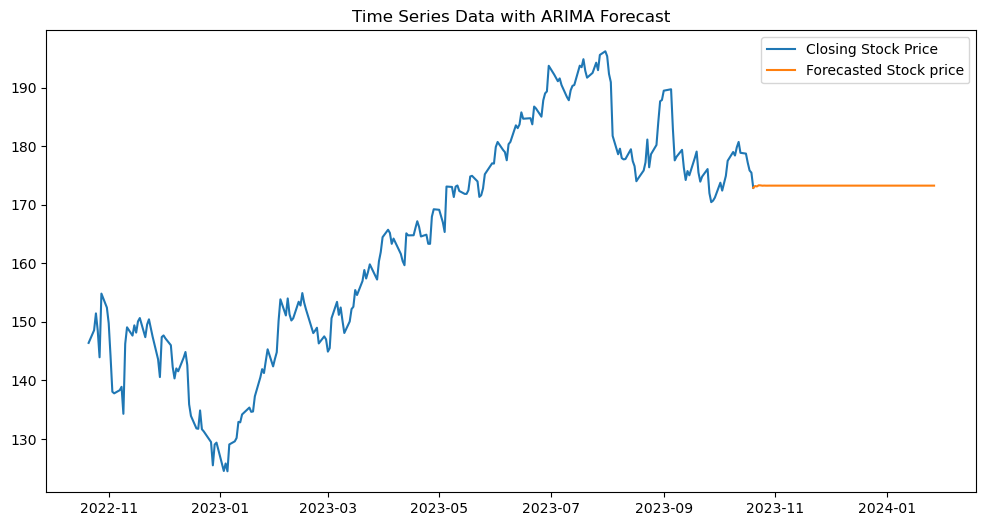

In [70]:
from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(df['Close'], order=(2,1,1))
# model = ARIMA(df['Close'], order=(5,1,0))
model = ARIMA(df['Close'], order=(5,1,0))
# df["Close"].value_counts()

model_fit = model.fit()

# data['Forecast'] = model_fit.predict(start=200, end=400, dynamic=True)
# Predict future values (e.g., next 7 days)
forecast_steps = 100
forecast = model_fit.get_forecast(steps=forecast_steps, dynamic=True)

# Plot the original time series data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label='Closing Stock Price')
plt.plot(pd.date_range(df["Close"].index[-1], periods=forecast_steps, freq='D'), forecast.predicted_mean, label='Forecasted Stock price')
plt.title('Time Series Data with ARIMA Forecast')
plt.legend()
plt.show()


# data[['Close', 'Forecast']].plot(figsize=(12,6))

# plt.title('Stock Price Prediction using ARIMA')

# plt.show()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate a sample time series data
np.random.seed(0)
time_series = pd.Series(np.random.randn(100), index=pd.date_range('2022-01-01', periods=100, freq='D'))
time_series
# Plot the original time series data
# plt.figure(figsize=(12, 6))
# plt.plot(time_series)
# plt.title('Original Time Series Data')
# plt.show()

2022-01-01    1.764052
2022-01-02    0.400157
2022-01-03    0.978738
2022-01-04    2.240893
2022-01-05    1.867558
                ...   
2022-04-06    0.706573
2022-04-07    0.010500
2022-04-08    1.785870
2022-04-09    0.126912
2022-04-10    0.401989
Freq: D, Length: 100, dtype: float64

In [78]:
from scipy.optimize import minimize
import math

# Assuming stock_list contains the symbols of the stocks in the portfolio
returns = close_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
# num_portfolios = 10000
risk_free_rate = 0.0178 # example value

# Portfolio optimization function
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
   returns = np.sum(mean_returns*weights ) *251
   std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(251)
   return std, returns

# Minimize negative Sharpe Ratio to get optimal portfolio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
   p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
   return -(p_ret - risk_free_rate) / p_var

# Constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Running the optimization
initial = [1./len(stock_list) for stock in stock_list]
bounds = tuple((0, 1) for asset in range(len(stock_list)))
result = minimize(neg_sharpe_ratio, initial, args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

print(result)
print([round(float(r), 2) for r in result.x])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.3459512916486633
       x: [ 6.905e-17  4.108e-01  4.687e-01  2.192e-17  1.206e-01]
     nit: 5
     jac: [ 2.373e-01 -8.946e-02 -8.948e-02  4.614e-01 -8.948e-02]
    nfev: 31
    njev: 5
[0.0, 0.41, 0.47, 0.0, 0.12]


In [71]:
df.shape

(251, 13)